In [7]:
import numpy as np
import pandas as pd

import requests

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
import pathlib

In [4]:
tf.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf
tf.config.experimental.enable_op_determinism()

In [14]:
from statistics import mean
from collections import defaultdict
import json
import requests

# from datetime import datetime, timedelta
# 
data = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=ECJCTAUGNRXNF2LN&outputsize=full')
data = data.json().get('Time Series (Daily)')
filtered_data = {k: v for k, v in data.items() if k.startswith("2023")}
array_data = [[k] + list(v.values()) for k, v in filtered_data.items()]
# df = pd.DataFrame(array_data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
# 
# news_data = requests.get('https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=ECJCTAUGNRXNF2LN&time_from=20220101T0000&time_to=20240101T0000&limit=1000')
# news_data = news_data.json()
# 
# time_to = "20240101T0000"
# time_from = "20230101T0000"
# time_to = datetime.strptime(time_to, "%Y%m%dT%H%M")
# time_from = datetime.strptime(time_from, "%Y%m%dT%H%M")
# 
# while time_to > time_from:
#     time_to = time_to.strftime("%Y%m%dT0000")
#     news_data = requests.get(f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=ECJCTAUGNRXNF2LN&time_from=20220101T0000&time_to=20230101T0000&limit=1000')
#     news_data = news_data.json()
#     time_to = time_to - timedelta(days=1)
# 
# 
# df_2022 = pd.read_csv('../../Tweet_Sentiment/THYAO/2022_final.csv').drop(['fark', 'tweet_count'], axis= 1).set_index('Unnamed: 0').sort_index()
# df_2021 = pd.read_csv('../../Tweet_Sentiment/THYAO/2021_final.csv').drop(['fark', 'tweet_count'], axis= 1).set_index('Unnamed: 0').sort_index()
# df = pd.concat([df_2022, df_2021]).sort_index()
# df

with open('data.json') as f:
    data = json.load(f)

sentiments_by_date = defaultdict(list)
for item in data:
    for sentiment in item['ticker_sentiment']:
        if sentiment['ticker'] == 'AAPL':
            sentiments_by_date[item['time_published'][:8]].append(float(sentiment['ticker_sentiment_score']) * float(sentiment['relevance_score']))

# # Calculate the average sentiment score for each day
average_sentiments = {date: mean(scores) for date, scores in sentiments_by_date.items()}
# 
# average_sentiments_df = pd.DataFrame(list(average_sentiments.items()), columns=['date', 'average_sentiment'])
# 
# # Convert array_data to DataFrame
# array_data_df = pd.DataFrame(array_data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
# 
# # Merge the two DataFrames on the date column
# merged_df = pd.merge(array_data_df, average_sentiments_df, on='date')

print(average_sentiments.pop('20230101'))
print(array_data.pop('2023-01-01'))
# print(average_sentiments)


AttributeError: 'NoneType' object has no attribute 'items'

In [5]:
scaler = MinMaxScaler()
scaler = scaler.fit(df.iloc[:-30, :])
df_for_training_scaled = scaler.transform(df)

scaler_for_inference = MinMaxScaler()
scaler_for_inference.fit_transform(pd.DataFrame(df.iloc[:-30,0]))

array([[0.02770428],
       [0.02677043],
       [0.02785992],
       [0.02770428],
       [0.02988327],
       [0.02801556],
       [0.03050584],
       [0.0370428 ],
       [0.03673152],
       [0.03626459],
       [0.03626459],
       [0.03937743],
       [0.03673152],
       [0.03315175],
       [0.03097276],
       [0.02801556],
       [0.02692607],
       [0.01634241],
       [0.02225681],
       [0.01883268],
       [0.01727626],
       [0.01805447],
       [0.01945525],
       [0.02023346],
       [0.01961089],
       [0.01945525],
       [0.01976654],
       [0.02038911],
       [0.01945525],
       [0.01712062],
       [0.0233463 ],
       [0.01992218],
       [0.02023346],
       [0.02132296],
       [0.02178988],
       [0.02708171],
       [0.03299611],
       [0.03003891],
       [0.03875486],
       [0.04031128],
       [0.04513619],
       [0.06085603],
       [0.06256809],
       [0.05945525],
       [0.06038911],
       [0.05836576],
       [0.06412451],
       [0.062

In [6]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future,[0]])

trainX, trainY = np.array(trainX), np.array(trainY)

print('TrainX shape = {}.'.format(trainX.shape))
print('TrainY shape = {}.'.format(trainY.shape))

TrainX shape = (453, 5, 3).
TrainY shape = (453, 1, 1).


In [7]:
X_train_lstm_without_twitter, X_test_lstm_without_twitter, y_train_lstm_without_twitter, y_test_lstm_without_twitter = train_test_split(trainX[:,:,:-1], trainY, test_size=30, shuffle=False)

X_train_lstm_twitter, X_test_lstm_twitter, y_train_lstm_twitter, y_test_lstm_twitter = train_test_split(trainX, trainY, test_size=30, shuffle=False)

X_train_lstm_without_twitter.shape,X_train_lstm_twitter.shape

((423, 5, 2), (423, 5, 3))

In [8]:
def build_model(input_shape):
    tf.keras.utils.set_random_seed(42)
    model = Sequential()
    
    model.add(LSTM(units = 256, return_sequences = True, input_shape = input_shape))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 256, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 128))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    model.summary()
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [9]:
lstm_model_without_twitter=build_model((X_train_lstm_without_twitter.shape[1],X_train_lstm_without_twitter.shape[2]))
lstm_model_twitter=build_model((X_train_lstm_twitter.shape[1],X_train_lstm_twitter.shape[2]))

history_without_twitter = lstm_model_without_twitter.fit(X_train_lstm_without_twitter, y_train_lstm_without_twitter, epochs=60, batch_size=64, verbose=1, )

history_twitter = lstm_model_twitter.fit(X_train_lstm_twitter, y_train_lstm_twitter, epochs=60, batch_size=64, verbose=1, )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 256)            265216    
                                                                 
 dropout (Dropout)           (None, 5, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 256)            525312    
                                                                 
 dropout_1 (Dropout)         (None, 5, 256)            0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

2022/12/16 15:04:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a1af242903034bd783a0e111f89d7b54', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/60
7/7 [==============================] - 4s 9ms/step - loss: 0.0600
Epoch 2/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0171
Epoch 3/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 4/60
7/7 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 5/60
7/7 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 6/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 7/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 8/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 9/60
7/7 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 10/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 11/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 12/60
7/7 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 13/60
7/7 [==============================] - 0s 9ms/step - loss: 0.

2022/12/16 15:04:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\assas\anaconda3\envs\tf\lib\site-packages\mlflow\tensorflow\__init__.py:189: UserWarning: The pyfunc inference behavior of Keras models logged with signatures differs from the behavior of Keras models logged without signatures. Specifically, when a signature is present, passing a Pandas DataFrame as input to the pyfunc `predict()` API produces an `ndarray` (for single-output models) or a dictionary of `str -> ndarray`: (for multi-output models). In contrast, when a signature is *not* present, `predict()` produces a Pandas DataFrame output in response to a Pandas DataFrame input."


INFO:tensorflow:Assets written to: C:\Users\assas\AppData\Local\Temp\tmpj5lpcncx\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\assas\AppData\Local\Temp\tmpj5lpcncx\model\data\model\assets
2022/12/16 15:05:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\assas\anaconda3\envs\tf\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."
2022/12/16 15:05:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '314577d4297944da8efacca912594f6f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/60
7/7 [==============================] - 3s 53ms/step - loss: 0.0604
Epoch 2/60
7/7 [==============================] - 0s 33ms/step - loss: 0.0120
Epoch 3/60
7/7 [==============================] - 0s 18ms/step - loss: 0.0063
Epoch 4/60
7/7 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 5/60
7/7 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 6/60
7/7 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 7/60
7/7 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 8/60
7/7 [==============================] - 0s 12ms/step - loss: 0.0019
Epoch 9/60
7/7 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 10/60
7/7 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 11/60
7/7 [==============================] - 0s 12ms/step - loss: 0.0013
Epoch 12/60
7/7 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 13/60
7/7 [==============================] - 0s 12ms/st

2022/12/16 15:05:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\assas\anaconda3\envs\tf\lib\site-packages\mlflow\tensorflow\__init__.py:189: UserWarning: The pyfunc inference behavior of Keras models logged with signatures differs from the behavior of Keras models logged without signatures. Specifically, when a signature is present, passing a Pandas DataFrame as input to the pyfunc `predict()` API produces an `ndarray` (for single-output models) or a dictionary of `str -> ndarray`: (for multi-output models). In contrast, when a signature is *not* present, `predict()` produces a Pandas DataFrame output in response to a Pandas DataFrame input."


INFO:tensorflow:Assets written to: C:\Users\assas\AppData\Local\Temp\tmpnd0jmxig\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\assas\AppData\Local\Temp\tmpnd0jmxig\model\data\model\assets


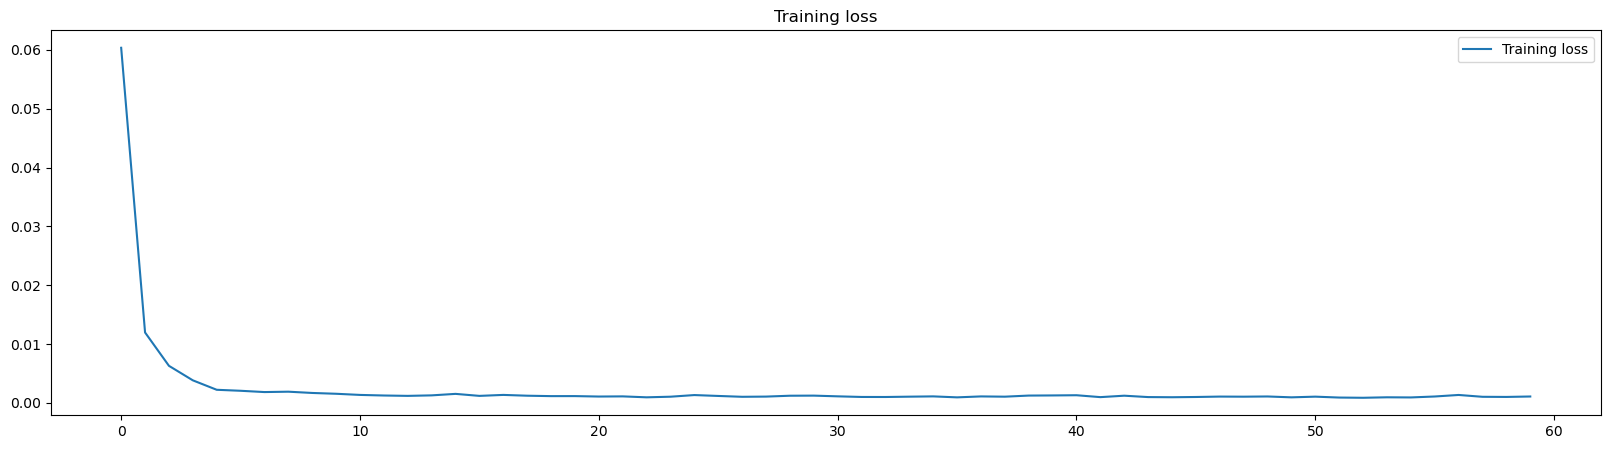

In [10]:
plt.figure(figsize=(20,5))
plt.plot(history_twitter.history['loss'], label='Training loss')
plt.title('Training loss')
plt.legend()

In [11]:
training_dates= df.index[:X_train_lstm_without_twitter.shape[0]]
#Make prediction

def predict(data):
    training_prediction_twitter = lstm_model_twitter.predict(X_train_lstm_twitter)
    return training_prediction_twitter
    
training_prediction_without_twitter = lstm_model_without_twitter.predict(X_train_lstm_without_twitter)

training_prediction_twitter = lstm_model_twitter.predict(X_train_lstm_twitter)

y_train_pred_lstm_without_twitter = scaler_for_inference.inverse_transform(training_prediction_without_twitter)

y_train_pred_lstm_twitter = scaler_for_inference.inverse_transform(training_prediction_twitter)

y_train_lstm_reshaped_without_twitter=y_train_lstm_without_twitter.reshape(y_train_lstm_without_twitter.shape[0], y_train_lstm_without_twitter.shape[2])

y_train_actual_lstm = scaler_for_inference.inverse_transform(y_train_lstm_reshaped_without_twitter)

14/14 [==============================] - 0s 7ms/step


In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

def plot_predictions_with_dates (type,twitter,dates,y_actual_lstm,y_pred_lstm):
    predicted_features=['şimdi']
    for i,predicted_feature in enumerate(predicted_features):
        plt.figure(figsize=(15,6))
        if twitter :
            plt.title(f'LSTM {type} prediction of {predicted_feature} feature After adding twitter sentiment analysis')
        else:
            plt.title(f'LSTM {type} prediction of {predicted_feature} feature without twitter sentiment analysis')
        sns.lineplot(x=dates, y=y_actual_lstm[:,i],label='Actual')
        sns.lineplot(x=dates, y=y_pred_lstm[:, i], label='Predicted')
        plt.show()
        error=mean_squared_error(y_actual_lstm[:,i], y_pred_lstm[:, i])
        print(f'Mean square error for {predicted_feature} ={error}')
    print('Total mean square error', mean_squared_error(y_actual_lstm, y_pred_lstm))

In [13]:
testing_dates= df.index[-X_test_lstm_without_twitter.shape[0]:]
#Make prediction
testing_prediction_without_twitter = lstm_model_without_twitter.predict(X_test_lstm_without_twitter)
testing_prediction_twitter = lstm_model_twitter.predict(X_test_lstm_twitter)

y_test_pred_lstm_without_twitter = scaler_for_inference.inverse_transform(testing_prediction_without_twitter)
y_test_pred_lstm_twitter = scaler_for_inference.inverse_transform(testing_prediction_twitter)

y_test_actual_lstm_reshaped_without_twitter=y_test_lstm_without_twitter.reshape(y_test_lstm_without_twitter.shape[0], y_test_lstm_without_twitter.shape[2])


y_test_actual_lstm = scaler_for_inference.inverse_transform(y_test_actual_lstm_reshaped_without_twitter)

1/1 [==============================] - 0s 23ms/step


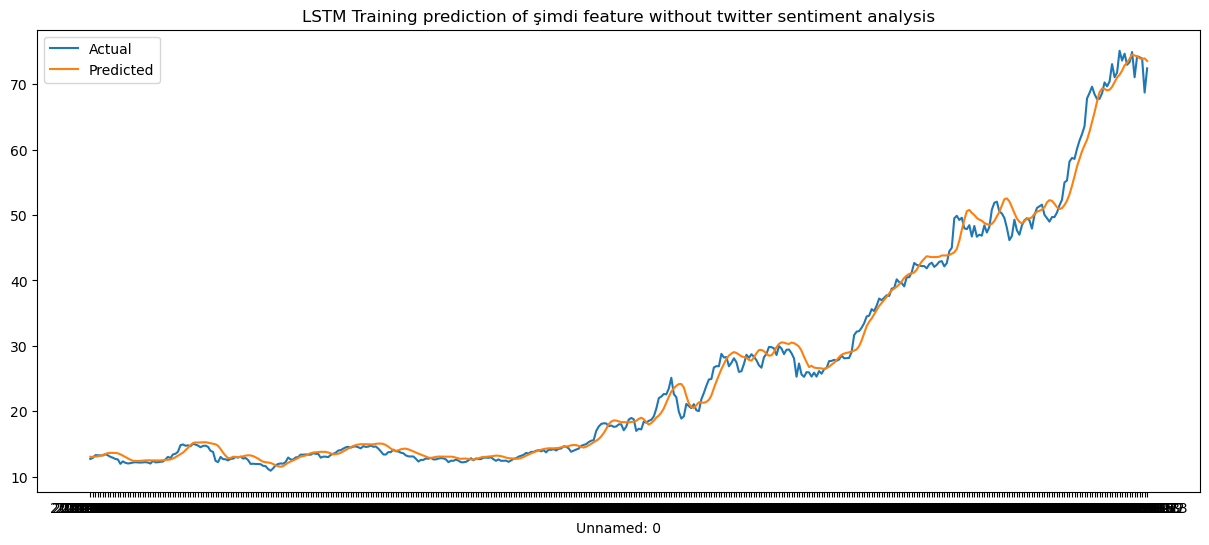

Mean square error for şimdi =2.330961382385352
Total mean square error 2.330961382385352


In [14]:
training_dates= df.index[:X_train_lstm_twitter.shape[0]]
plot_predictions_with_dates('Training',False,training_dates,y_train_actual_lstm ,y_train_pred_lstm_without_twitter)

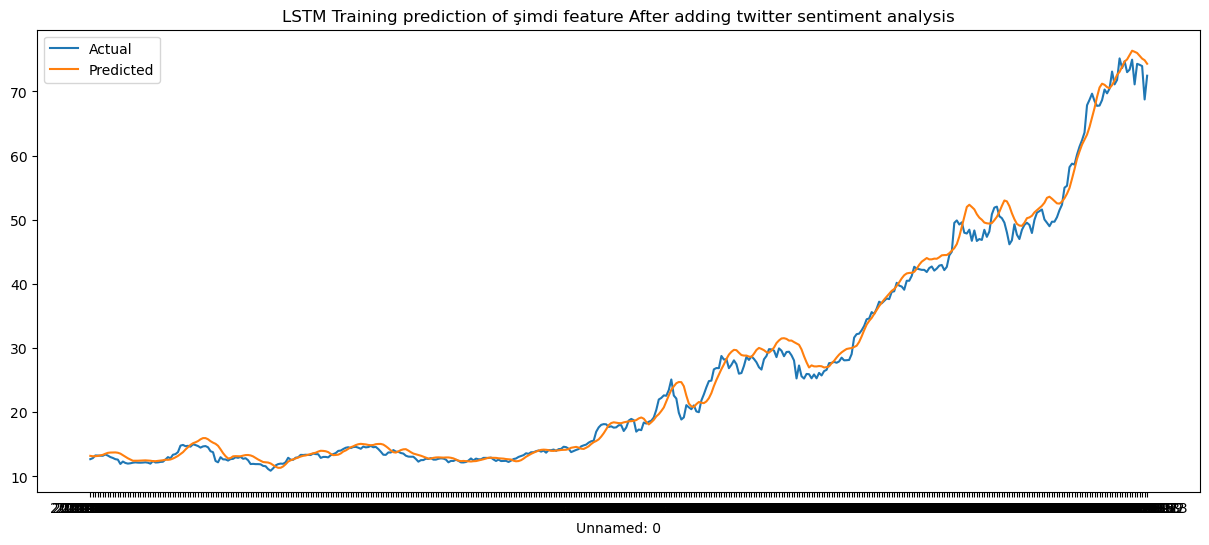

Mean square error for şimdi =2.4808512756856165
Total mean square error 2.4808512756856165


In [15]:
training_dates= df.index[:X_train_lstm_twitter.shape[0]]
plot_predictions_with_dates('Training',True,training_dates,y_train_actual_lstm ,y_train_pred_lstm_twitter)

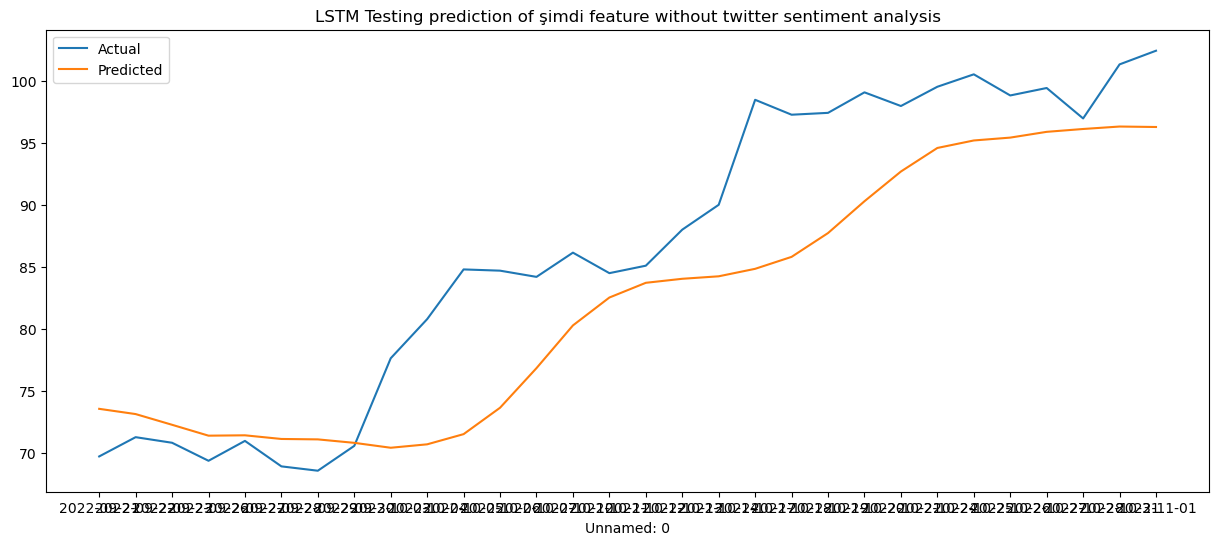

Mean square error for şimdi =42.775460603524955
Total mean square error 42.775460603524955


In [16]:
plot_predictions_with_dates('Testing',False,testing_dates,y_test_actual_lstm,y_test_pred_lstm_without_twitter)

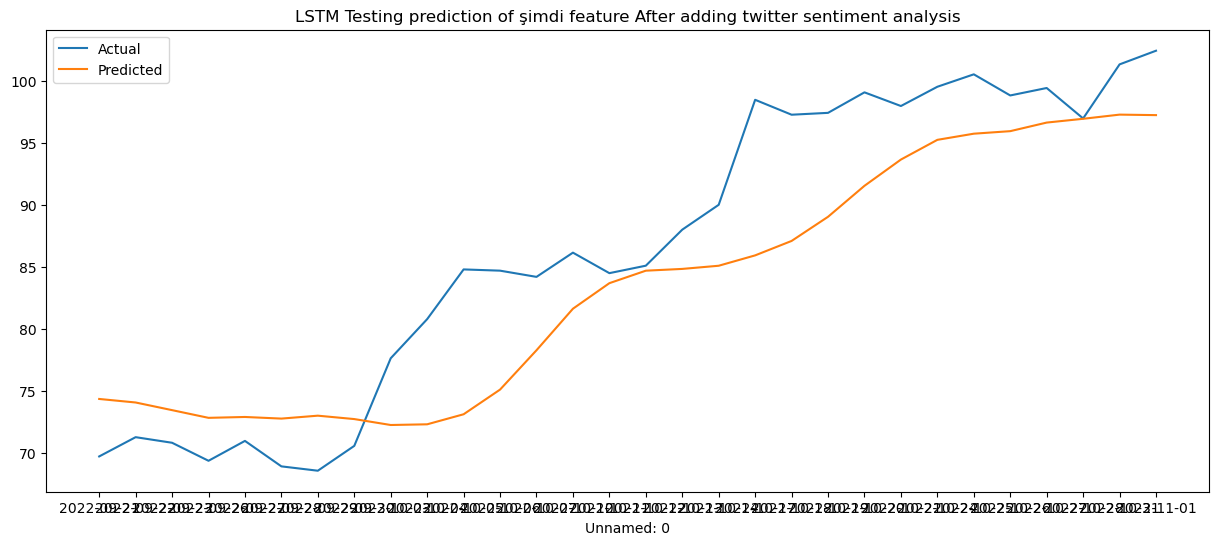

Mean square error for şimdi =33.80611321648723
Total mean square error 33.80611321648723


In [17]:
plot_predictions_with_dates('Testing',True,testing_dates,y_test_actual_lstm,y_test_pred_lstm_twitter)